In [2]:
import pandas as pd
from PIL import Image

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import sklearn.datasets as datasets
from sklearn.externals.six import StringIO

from IPython.display import Image  
import pydotplus




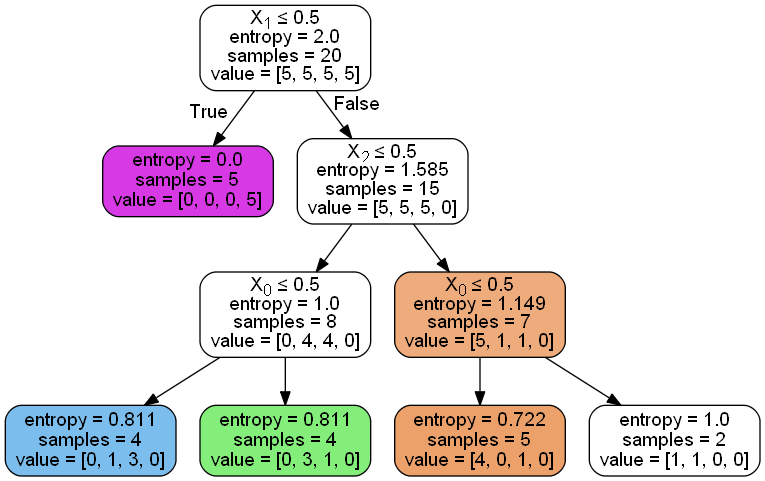

In [8]:
df = pd.read_csv('politicians_dataset.csv')

for title in df.columns[2:]:
    df[title] = df[title].apply(lambda x: 1 if x == 'y' else 0)

X = df[['education','scotland','tax']]
y = df['Party']

dtree = DecisionTreeClassifier(criterion = "entropy")
dtree.fit(X,y)


dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                special_characters=True,
                rounded = True, proportion = False, 
                filled = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())